In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

### 1. Load DataSets

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 2. Cancer Data Analysis

In [3]:
pd.DataFrame(cancer.data, columns=cancer.feature_names).head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
X = cancer.data
y = cancer.target

In [5]:
print('Feature_names \n', cancer.feature_names)
print('-'*70)
print('target_names \n', cancer.target_names)
print('-'*70)
print('Data shape\n', cancer.data.shape)

Feature_names 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
----------------------------------------------------------------------
target_names 
 ['malignant' 'benign']
----------------------------------------------------------------------
Data shape
 (569, 30)


In [6]:
# binary일때 개수 셈에 용이
np.bincount(cancer.target)
# 좌 악성(0), 우 양성(1)

array([212, 357], dtype=int64)

In [7]:
print('Sample Count per class : \n{}'.format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample Count per class : 
{'malignant': 212, 'benign': 357}


In [8]:
[f"{idx} : {o}" for idx,o in enumerate(cancer.feature_names)]

['0 : mean radius',
 '1 : mean texture',
 '2 : mean perimeter',
 '3 : mean area',
 '4 : mean smoothness',
 '5 : mean compactness',
 '6 : mean concavity',
 '7 : mean concave points',
 '8 : mean symmetry',
 '9 : mean fractal dimension',
 '10 : radius error',
 '11 : texture error',
 '12 : perimeter error',
 '13 : area error',
 '14 : smoothness error',
 '15 : compactness error',
 '16 : concavity error',
 '17 : concave points error',
 '18 : symmetry error',
 '19 : fractal dimension error',
 '20 : worst radius',
 '21 : worst texture',
 '22 : worst perimeter',
 '23 : worst area',
 '24 : worst smoothness',
 '25 : worst compactness',
 '26 : worst concavity',
 '27 : worst concave points',
 '28 : worst symmetry',
 '29 : worst fractal dimension']

### 3. Model Generator and Train

In [9]:
params = {'max_depth':[3,4,5,6,7], 'min_samples_split':[15,20,25,30,35,40,45]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

grid_clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5, refit=True)
grid_clf.fit(X_train, y_train)
grid_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [15, 20, 25, 30, 35, 40, 45]},
    

### 4. Predict

In [10]:
print('최적 파라미터:',grid_clf.best_params_)
print('best score',grid_clf.best_score_)
estimator = grid_clf.best_estimator_
pred = estimator.predict(X_test)


최적 파라미터: {'max_depth': 3, 'min_samples_split': 20}
best score 0.9340659340659341


### 5. Evaluate

In [11]:
score = accuracy_score(pred,y_test, normalize=True)
# score = accuracy_score(pred,y_test, normalize=False)  #예측한 건수로 출력
score

0.9298245614035088

### 6. Grapviz

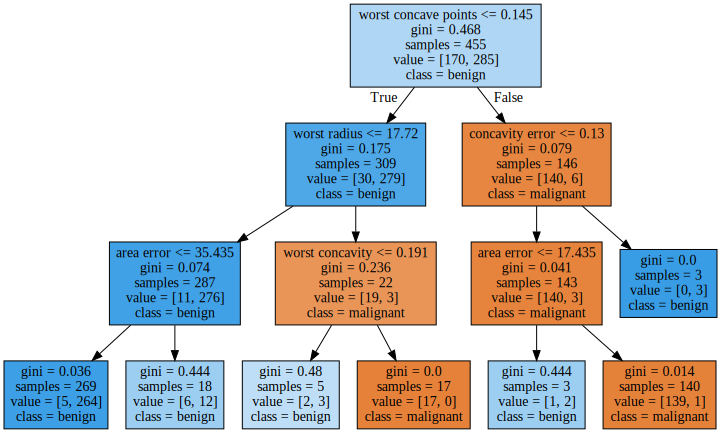

'cancer_tree.png.pdf'

In [12]:
from sklearn.tree import export_graphviz
import graphviz
# impurity : 지니계수
# filled : 색채움

export_graphviz(estimator, out_file='cancer_tree.dot', class_names=cancer.target_names,
               feature_names=cancer.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('cancer_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')


### 7. Feature importance

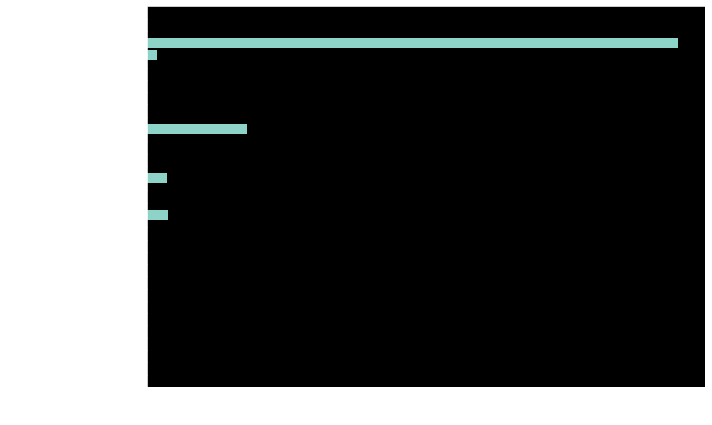

In [13]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features) # 그림의 범위를 수동으로 지정할때
    
plot_feature_importances_cancer(estimator)
